# DS 3000 - Assignment 4

**Student Name**: Janav Sama

**Date**: 06/05/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
sns.set_style('darkgrid')

## Question 1: 

Load the data directly from the URL into a DataFrame.

In [2]:
# Using Pandas to read the CSV file
babies_data = pd.read_csv('babies.csv')

In [3]:
# Checking the values in the DataFrame
babies_data.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


## Question 2 (10 pts): 

Prepare the data for analysis. Ensure that you address the following:
1. Perform EDA using the dataset to demonstrate patterns.
2. Handle any missing data and invalid data. Justify your approach.
3. Plot a histogram of the birth weight and explain the overall distribution. 

Based on the data, I've decided to drop/strip any missing data to ensure uniformity across all columns

In [4]:
# Dropping any nan values in age
babies_data = babies_data.dropna()

In [5]:
# Converting variable types
babies_data['bwt'] = babies_data['bwt'].astype('float64')
babies_data['gestation'] = babies_data['gestation'].astype('int64')
babies_data['parity'] = babies_data['parity'].astype('category')
babies_data['age'] = babies_data['age'].astype('int64')
babies_data['smoke'] = babies_data['smoke'].astype('category')

In [6]:
# Confirming change
babies_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1174 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   case       1174 non-null   int64   
 1   bwt        1174 non-null   float64 
 2   gestation  1174 non-null   int64   
 3   parity     1174 non-null   category
 4   age        1174 non-null   int64   
 5   height     1174 non-null   float64 
 6   weight     1174 non-null   float64 
 7   smoke      1174 non-null   category
dtypes: category(2), float64(3), int64(3)
memory usage: 66.7 KB


In [7]:
# Dropping duplicate values
babies_data.drop_duplicates(inplace=True)

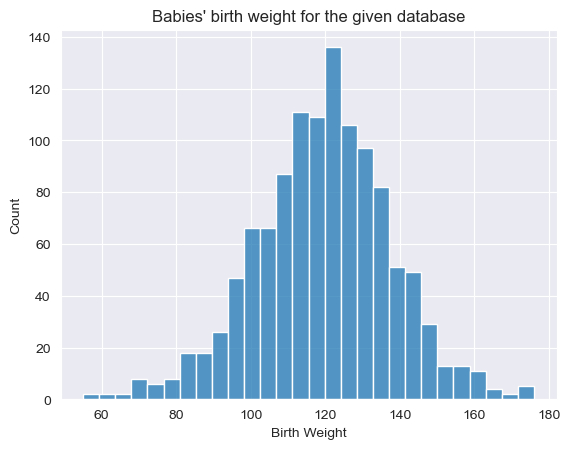

In [8]:
# Plotting a histogram of the birth weight.
bwt = (babies_data['bwt'])
sns.histplot(data = bwt)
plt.xlabel('Birth Weight')
plt.title("Babies' birth weight for the given database")
plt.show()

Overall, the weight of most babies seemed to be normal with a few outliers present. The normal range in this dataset seems to be from (90lbs to 150lbs) as most babies weighed somewhere in between that range. Outliers like 180lbs and 60lbs are also present.

## Question 3 (5 pts): 

Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected.  Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.

After exploring several features, I have landed on the following:

1. Age - the age of the mother has a strong relationship with the overall health of a human being.
2. Gestation - typically, the longer the baby stays in the womb (within a reasonable number of days), the more nourished they are.
3. Height - this might have a relationship with the overall height and its relevance to weight.
4. Smoke - smoking during pregnancy is considered unhealthy - therefore it might have an impact on the overall health and/or weight of the baby.

The above features or factors are what I assumed affects the weight of a baby.

In [9]:
# Selecting features to build the model
X = babies_data[['age', 'gestation', 'height', 'smoke']]
y = babies_data['bwt']

## Question 4 (2 pts): 

Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set. 

In [10]:
# Encoding the categorical feature
babies_data = pd.get_dummies(babies_data, drop_first=True)

In [11]:
# Partitioning the prepared data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X,              
                                                    y,              
                                                    test_size=0.2,  
                                                    random_state=10
                                                   )

## Question 5 (5 pts): 

Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

Using Random Forest Regressor made sense in this situation because:

1. Nature of the Target Variable: Since bwt (birth weight) is continuous, predicting its value fits a regression model rather than a classification model.
2. Prediction Goals: The goal is to predict an exact numerical value for birth weight; not to fit the values into a category.

In [12]:
# Building the model

# Using the Random Forest Regressor
rf = RandomForestRegressor(random_state=1, n_estimators = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

## Question 6 (5 pts): 

Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression. 

Despite experimenting with the features, the best ones selected have the following:

- Low R-squared (0.09): The model explains only a small fraction of the variance in the target variable, indicating poor performance in capturing the underlying patterns.
- High MSE (259.93): Suggests significant errors in the predictions, pointing to a lack of precision in the model's output.

In [13]:
# Using MSE and R2 to assess the model
mse = round(mean_squared_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print('R-squared:', r2)
print('The MSE of the model is:', mse)

R-squared: 0.2
The MSE of the model is: 281.09


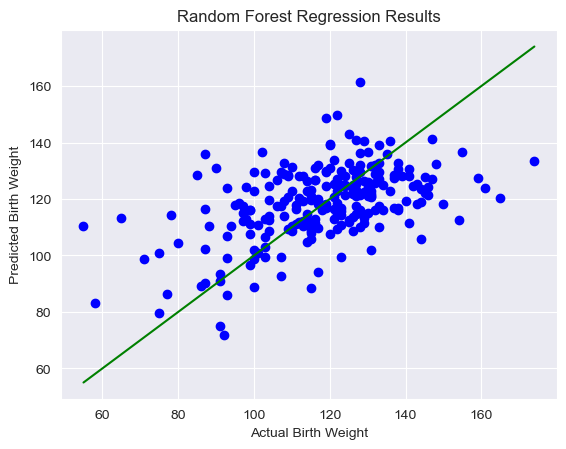

In [14]:
# Plotting the relation and occurance between the predicted and the actual weights
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Birth Weight')
plt.ylabel('Predicted Birth Weight')
plt.title('Random Forest Regression Results')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green')  # Line for prediction
plt.show()

## Question 7 (5 pts): 

What are your thoughts on the model's prediction capability? Did it do a good job of predicting the tip_amount?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.

The model doesnt have a good predicting capability. To fix this, I used GridSearchCV to iterate and find the best n_estimator. I then ran the model through the ideal number and printed the evaluation scores. The new model performed significantly better than the previous one.

In [15]:
# Creating the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Extracting the best model
best_rf = grid_search.best_estimator_

# Predicting using the best model
y_pred = best_rf.predict(X_test)

# Using MSE and R2 to assess the model
mse = round(mean_squared_error(y_test, y_pred), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print('Best parameters found: ', grid_search.best_params_)
print('R-squared:', r2)
print('The MSE of the model is:', mse)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best parameters found:  {'n_estimators': 500}
R-squared: 0.3
The MSE of the model is: 248.23


## Question 8 (15 pts): 

Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

Based on my analysis, the Random Forest Regression model performed better than the KNN model.

In [16]:
# Creating a KNN Model

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [17]:
# Checking the knn score
print('The accuracy of the model is: {}'.format(round(knn.score(X_test, y_test),2)))

The accuracy of the model is: 0.03


In [18]:
# Setting parameter grid values
param_grid = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance']
}

# Creating a base model
knn = KNeighborsClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2)

# Fitting the grid search to the data
grid_search.fit(X_train, y_train)

# Extracting the best model
best_knn = grid_search.best_estimator_

# Predicting using the best model
y_pred = best_knn.predict(X_test)

# Calculating the accuracy
accuracy = round(accuracy_score(y_test, y_pred), 2)

print('Best parameters found: ', grid_search.best_params_)
print('The accuracy of the model is:', accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found:  {'n_neighbors': 20, 'weights': 'distance'}
The accuracy of the model is: 0.02


/Users/janavsama/anaconda3/envs/ds3000/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


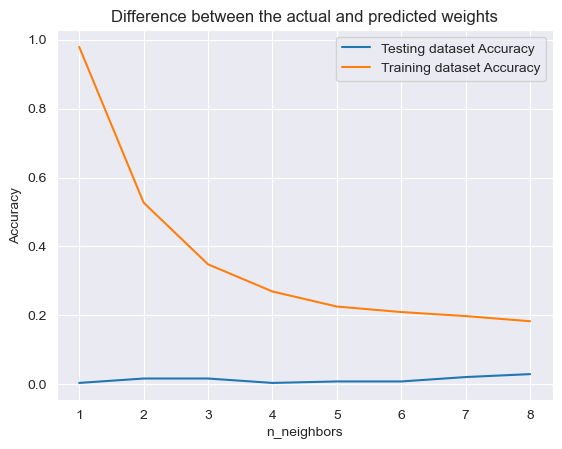

In [19]:
# Graphing the difference between the actual and predicted weights
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 

for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
plt.title('Difference between the actual and predicted weights')
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()

## Question 9 (3 pts): 

Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

Based on the evaluation metrics:

The Random Forest Regressor has a slight edge because it is designed for regression tasks and provides continuous predictions, which aligns with the goal of predicting birth weight.
The k-NN Classifier performs poorly with only 2% accuracy and is inherently a classification model, making it less suitable for this regression problem.

Recommendations for Improvement

1. Perform further hyperparameter tuning to optimize the model.
2. Expand the data set to be more accurate about the model.

## Question 10 (5 pts): 

The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

In [20]:
# Extracting features and its importance in terms of weightage
feature_names = list(X)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values('Importance', ascending=False) 
print(feature_imp_df)

     Feature  Importance
1  gestation    0.453481
0        age    0.271859
2     height    0.209986
3      smoke    0.064674


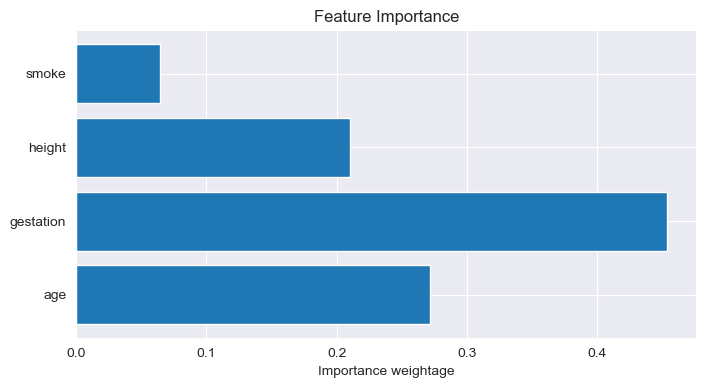

In [21]:
# Creating a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(feature_names, importances)
plt.xlabel('Importance weightage')
plt.title('Feature Importance')
plt.show()

Gestation has a high importance in the set of features. One reason for this could be that the values in gestation are much higher than the rest. Coincidentally, this works on our favor as it was assumed that the longer the gestation period, the healthier babies to tend to be, therefore having a healthy, average weight. Also, the overall age also matters as this is usually one of the idicators of health as well.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.


Sources that contributed:

https://stats.stackexchange.com/questions/254638/should-i-choose-random-forest-regressor-or-classifier

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

https://www.geeksforgeeks.org/random-forest-regression-in-python/

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

https://www.geeksforgeeks.org/feature-importance-with-random-forests/